# Load Data

Source yang digunakan didownload dari ['https://www.kaggle.com/datasets/abhikjha/movielens-100k'](https://www.kaggle.com/datasets/abhikjha/movielens-100k)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhikjha/movielens-100k")

print("Path to dataset files:", path)

100%|██████████| 971k/971k [00:00<00:00, 17.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhikjha/movielens-100k/versions/1


Ada dua dataset yang akan digunakan:

In [2]:
import pandas as pd

movies_df = pd.read_csv(path + "/ml-latest-small/movies.csv")
ratings_df = pd.read_csv(path + "/ml-latest-small/ratings.csv")

### fungsi dataset_summary()

fungsi `dataset_summary` akan digunakan untuk menampilkan informasi mengenai fitur-fitur, keberadaan nilai null, dan keberadaan nilai duplikat di setiap dataset.

In [3]:
# Fungsi untuk menampilkan info dataset, jumlah nilai unik, jumlah baris dengan nilai null, dan jumlah duplikat
def dataset_summary(df, name):
    print(f"\n{'='*50}")
    print(f"\nINFO DATASET {name.upper()}")
    print(df.info())
    print("\nJumlah Nilai Unik pada Kolom:")
    print(df.nunique())

    # Menampilkan jumlah baris yang mengandung nilai null
    null_rows = df.isnull().any(axis=1).sum()
    print(f"\nJumlah Baris dengan Nilai Null: {null_rows}")

    # Menampilkan jumlah baris duplikat
    duplicate_rows = df.duplicated().sum()
    print(f"Jumlah Baris Duplikat: {duplicate_rows}")

### movies_df

Pada tahap ini dilakukan eksplorasi data pada movies_df.

In [4]:
dataset_summary(movies_df, "Movies")



INFO DATASET MOVIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Jumlah Nilai Unik pada Kolom:
movieId    9742
title      9737
genres      951
dtype: int64

Jumlah Baris dengan Nilai Null: 0
Jumlah Baris Duplikat: 0


In [5]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**movies.csv (movies_df)**    
Dataset ini berisi informasi tentang judul dan genre dari dari 9.742 film. Tidak ada missing value atau duplikat pada **movies_df**. Dataset ini terdari dari 3 fitur, yaitu `movieId, title, genres`. Berikut penjelasan detail setiap fitur:

1. **movieId**  
   - **Tipe Data**: Integer ( Unique Identifier)  
   - **Deskripsi**: ID unik yang mengidentifikasi setiap film dalam dataset.  
   - **Contoh Nilai**: `1`, `2`, `3`, dst.  

2. **title**  
   - **Tipe Data**: String (Text)  
   - **Deskripsi**: Judul film beserta tahun rilisnya.  
   - **Contoh Nilai**: `"Toy Story (1995)"`, `"Jumanji (1995)"`.  
   - **Catatan**: Terdapat 9.737 judul unik, beberapa film memiliki judul yang sama.  

3. **genres**  
   - **Tipe Data**: String (kategori multi-label)  
   - **Deskripsi**: Genre film . Satu film memiliki lebih dari satu genre yang dipisahkan oleh tanda pipe (`|`).  
   - **Contoh Nilai**: `"Adventure|Animation|Children"`, `"Action|Animation|Comedy|Fantasy"`.  
   - **Catatan**: Terdapat 951 kombinasi genre berbeda, menunjukkan variasi yang cukup tinggi dalam pengategorian film.  

---

Diagram di bawah ini menunjukkan distribusi genre pada film-film di movies_df.

Film-film yang mengandung unsur-unsur Drama, Comedy banyak diproduksi, masing-masing lebih dari  4000 dan 3000 film.

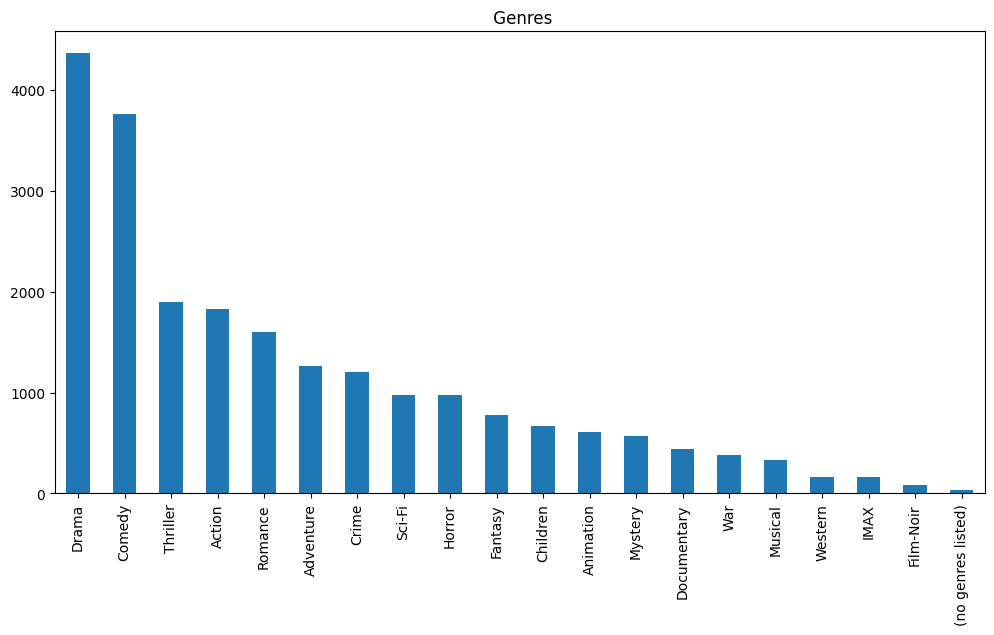

In [ ]:
import matplotlib.pyplot as plt

# Genre analysis for movies dataset
genres = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
genres.plot(kind='bar', title=' Genres')
plt.show()

---

Daftar kombinasi genre dari masing-masing judul film dapat dilihat di bawah ini:

- Fitur genres mengandung sekumpulan genre yang ditulis secara terpisah menggunakan pipe. Pada bagian data preparation, pipe akan diganti dengan space agar memudahkan vektorisasi.
- Kombinasi genre, perbedaan total genre yang beragam di fitur genres menyebabkan nilai unik pada fitur genres sangat banyak (951).

In [ ]:
movies_df['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

### ratings_df

Pada tahap ini dilakukan eksplorasi data terhadap ratings_df

In [ ]:
dataset_summary(ratings_df, "Ratings")



INFO DATASET RATINGS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Jumlah Nilai Unik pada Kolom:
userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

Jumlah Baris dengan Nilai Null: 0
Jumlah Baris Duplikat: 0


In [6]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


**ratings.csv (ratings_df)**    
Dataset ini berisi rating yang diberikan oleh pengguna terhadap film-film tertentu. Tidak ada missing value atau duplikat pada **ratings_df**  Dataset ini terdiri dari fitur `userId, movieId, rating, timestamp`. Berikut penjelasan detail setiap fitur:

1. **userId**  
   - **Tipe Data**: Integer  
   - **Deskripsi**: ID unik yang mengidentifikasi pengguna yang memberikan rating.  
   - **Contoh Nilai**: `1`, `2`, `3`, dst.  
   - **Catatan**: Terdapat 610 pengguna unik dalam dataset.  

2. **movieId**  
   - **Tipe Data**: Integer  
   - **Deskripsi**: ID film yang diberi rating (berkaitan dengan `movieId` di `movies_df`).  
   - **Contoh Nilai**: `1`, `2`, `3`, dst.  
   - **Catatan**: Terdapat 9.724 film yang diberi rating, artinya beberapa film tidak memiliki rating.  

3. **rating**  
   - **Tipe Data**: Float
   - **Deskripsi**: Nilai rating yang diberikan pengguna pada suatu film.  
   - **Contoh Nilai**: `4.0`, `3.5`, `5.0`.  
   - **Catatan**: Terdapat 10 nilai unik (bernilai antara 0.5–5.0 dengan selisih antar nilai 0,5) .  

4. **timestamp**  
   - **Tipe Data**: Integer (Unix Timestamp)  
   - **Deskripsi**: Waktu saat rating diberikan, dalam format detik sejak **1 Januari 1970 (epoch time)**.  
   - **Contoh Nilai**: `964982703`, `964982296`.  
   - **Catatan**: Kolom ini bisa dikonversi ke format tanggal/waktu jika diperlukan untuk analisis temporal.  

Catatan pada poin 3. rating di atas berasal dari daftar di bawah ini:

In [ ]:
ratings_df['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

---

Diagram di bawah ini menunjukkan distribusi rating yang diberikan user untuk film-film yang telah mereka tonton.

lebih dari 35% film mendapatkan rating tinggi ( rating >= 4)
- lebih dari 12,5% film mendapatkan rating 5
- lebih dari 8% film mendapatkan rating 4.5
- lebih dari 25% film mendapatkan rating 4

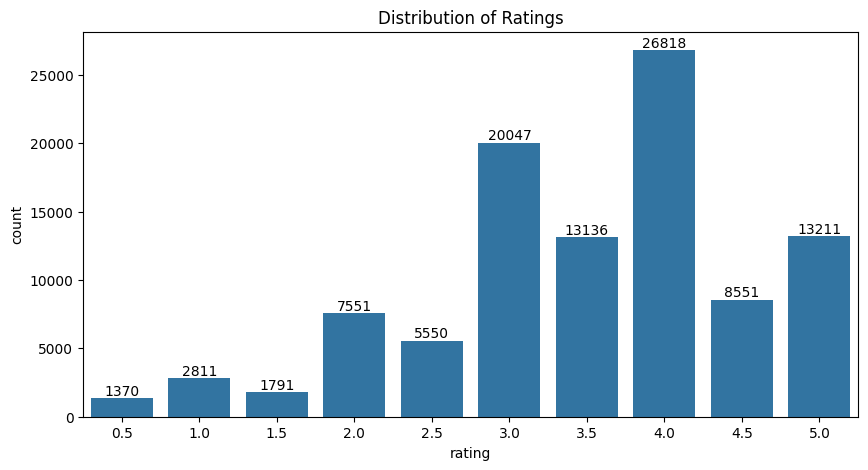

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
ax = sns.countplot(x='rating', data=ratings_df)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Ratings')
plt.show()

---

**movies_df** dan **ratings_df** akan digabung di bagian data preparation dan data gabungan ini akan digunakan dalam proses modeling.

# Data Preparation

## movies_new

Pada tahap ini `movies_df` dan `ratings_df` digabungkan untuk menghasilkan dataframe baru `movies_new` yang terdiri dari `'userId', 'movieId', 'title', 'genres', 'rating'`.

In [ ]:
# movies_new, gabungan movies_df dengan subset ratings_df berdasarkan movieId
movies_new = pd.merge(movies_df, ratings_df[['userId', 'movieId', 'rating']], on='movieId', how='inner')
movies_new = movies_new[['userId', 'movieId', 'title', 'genres', 'rating']]
movies_new

,userId,movieId,title,genres,rating
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
...,...,...,...,...,...
100831,184,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
100832,184,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
100833,184,193585,Flint (2017),Drama,3.5
100834,184,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5


Kemudian, dari `movies_new` hanya dipertahankan data dengan kemunculan userId minimal 10 kali dan kemunculan movieId minimal 100 kali. Dataframe baru ini akan digunakan untuk proses selanjutnya.

In [ ]:
user_review_counts = movies_new['userId'].value_counts()
movie_review_counts = movies_new['movieId'].value_counts()

valid_users = user_review_counts[user_review_counts >= 10].index
valid_movies = movie_review_counts[movie_review_counts >= 100].index

movies_new = movies_new[
    (movies_new['userId'].isin(valid_users)) &
    (movies_new['movieId'].isin(valid_movies))
]

Dalam sistem content-based filtering atau collaborative filtering, menentukan batasan minimal jumlah review per user (userId) atau per movie (movieId) adalah penting untuk:

- Mengurangi data yang sparse (jarang) – Menghilangkan user atau movie dengan terlalu sedikit review agar model tidak belajar dari data yang terlalu noise.

- Meningkatkan kualitas rekomendasi – User yang hanya mereview 1-2 movie tidak memberikan cukup informasi untuk membuat rekomendasi yang baik.

## content_based_prep

### content_based_df

Pada tahap ini, dibuat dataframe baru `content_based-df` yang terdiri dari `'movieId', 'title', 'genres'`. Dataframe ini akan digunakan untuk membuat model content-based filtering.

In [ ]:
content_based_df = movies_new[['movieId', 'title', 'genres']].copy()
content_based_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...
91494,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
91495,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
91496,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
91497,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


`content_based_df` terdiri dari tiga kolom `'movieId', 'title', 'genres'` dan 20188 baris.

### drop duplicates

pembuatan content_based_df menghasilkan data duplikat sehingga perlu di drop.

In [ ]:
# Pastikan data unik (hilangkan duplikat)
content_based_df = content_based_df.drop_duplicates(subset=['movieId', 'title']).reset_index(drop=True)

In [ ]:
content_based_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  138 non-null    int64 
 1   title    138 non-null    object
 2   genres   138 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


Setelah penghapusan data duplikat, tersisa 138 rows data unik di `content_based_df`

### replace pipe dengan space pada genres, dan lowercasing


Pada tahap ini dilakukan replacement pada `genres`, pipe diganti dengan space dan huruf dibuat lowercase agar bisa dibaca TF-IDF dengan mudah.

In [ ]:
# Ubah format genre
content_based_df['genres'] = content_based_df['genres'].str.replace('|', ' ').str.lower()

Setelah replacement, dan lowercasing setiap genre dipisahkan oleh space dan semua hurufnya menjadi lowercase seperti pada sampel di bawah ini:

In [ ]:
content_based_df

,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
2,6,Heat (1995),action crime thriller
3,10,GoldenEye (1995),action adventure thriller
4,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller
...,...,...,...
133,48516,"Departed, The (2006)",crime drama thriller
134,58559,"Dark Knight, The (2008)",action crime drama imax
135,60069,WALL·E (2008),adventure animation children romance sci-fi
136,68954,Up (2009),adventure animation children drama


### genre_tfidf_matrix

Tahap ini bertujuan mengubah teks dalam kolom 'genres' menjadi representasi numerik berbasis TF-IDF dan menyimpannya dalam variabel genre_tfidf_matrix untuk kemudian dihitung cosine similarity-nya pada bagian modeling.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
genre_tfidf_matrix = tf.fit_transform(content_based_df['genres'])

In [ ]:
genre_tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 451 stored elements and shape (138, 18)>

`genre_tfidf_matrix` merupakan matriks berisi nilai float yang terdiri dari 138 baris dan 18 kolom.

setiap kolom mewakili satu genre yang berbeda seperti yang dapat dilihat di bawah ini:

In [ ]:
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'drama', 'fantasy', 'fi', 'horror', 'imax', 'musical', 'mystery',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

sampel matrix genre_tfidf_matrix dapat dilihat seperti di bawah ini:

In [ ]:
pd.DataFrame(
    genre_tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=content_based_df['title']
)

,action,adventure,animation,children,comedy,crime,drama,fantasy,fi,horror,imax,musical,mystery,romance,sci,thriller,war,western
title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.000000,0.319850,0.559310,0.490464,0.347424,0.000000,0.000000,0.472874,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Jumanji (1995),0.000000,0.424971,0.000000,0.651657,0.000000,0.000000,0.000000,0.628286,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Heat (1995),0.502026,0.000000,0.000000,0.000000,0.000000,0.651038,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.569315,0.0,0.0
GoldenEye (1995),0.536654,0.584488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.608585,0.0,0.0
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.455644,0.0,0.000000,0.0,0.652699,0.000000,0.455644,0.398449,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Departed, The (2006)",0.000000,0.000000,0.000000,0.000000,0.000000,0.646411,0.512467,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.565270,0.0,0.0
"Dark Knight, The (2008)",0.352485,0.000000,0.000000,0.000000,0.000000,0.457109,0.362391,0.000000,0.000000,0.0,0.731764,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
WALL·E (2008),0.000000,0.300861,0.526104,0.461346,0.000000,0.000000,0.000000,0.000000,0.358233,0.0,0.000000,0.0,0.000000,0.403974,0.358233,0.000000,0.0,0.0


## collaborative_prep

### collab_based_df

Pada tahap ini, dibuat dataframe baru `collab_based-df` yang terdiri dari `'userId', 'movieId', 'rating'`. Dataframe ini akan digunakan untuk membuat model collaborative filtering.

In [ ]:
collab_based_df = movies_new[['userId', 'movieId', 'rating']].copy()
collab_based_df

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
91494,596,79132,4.0
91495,598,79132,5.0
91496,599,79132,3.0
91497,601,79132,5.0


In [ ]:
collab_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20188 entries, 0 to 91498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   20188 non-null  int64  
 1   movieId  20188 non-null  int64  
 2   rating   20188 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 630.9 KB


`collab_based_df` terdiri dari tiga kolom `'userId', 'movieId', 'rating'` dan 20188 baris.

### encode userId

Encoding `userId` dari  `collab_based_df` menggunakan fungsi `enumerate` untuk menghasilkan kolom baru `user`. Fitur ini akan digunakan sebagai variabel prediktor pada proses training.

In [ ]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = collab_based_df['userId'].unique().tolist()
print('list userId: ', user_ids)

#  Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

#  Melakukan proses encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Mapping userId ke collab_based_df['user']
collab_based_df['user'] = collab_based_df['userId'].map(user_to_user_encoded)
print('encoded angka ke userId: ', user_encoded_to_user)


list userId:  [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, 40, 43, 44, 45, 46, 50, 54, 57, 63, 64, 66, 68, 71, 73, 76, 78, 82, 86, 89, 90, 91, 93, 96, 98, 103, 107, 112, 119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151, 153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179, 182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217, 219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252, 254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280, 282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323, 328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399, 401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451, 453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483, 484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 525, 528, 529, 533, 534, 541, 544, 550, 555, 559, 560, 561, 562, 567, 570, 572, 573, 579, 580, 584, 587, 590, 596, 597, 599,

### encode movieId

Encoding `movieId` dari  `collab_based_df` menggunakan fungsi `enumerate` untuk menghasilkan kolom baru `movie`. Fitur ini akan digunakan sebagai variabel prediktor pada proses training.



In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = collab_based_df['movieId'].unique().tolist()
print('list movieId: ', movie_ids)

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded)

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Mapping movieId ke collab_based_df['movie']
collab_based_df['movie'] = collab_based_df['movieId'].map(movie_to_movie_encoded)
print('encoded angka ke movieId: ', user_encoded_to_user)

list movieId:  [1, 2, 6, 10, 32, 34, 39, 47, 50, 110, 111, 150, 153, 161, 165, 185, 208, 223, 231, 253, 260, 292, 293, 296, 316, 318, 329, 344, 349, 356, 357, 364, 367, 377, 380, 434, 454, 457, 480, 500, 527, 539, 541, 586, 587, 588, 589, 590, 592, 593, 595, 597, 608, 648, 733, 736, 778, 780, 858, 912, 924, 1036, 1073, 1089, 1097, 1136, 1193, 1196, 1197, 1198, 1200, 1206, 1208, 1210, 1213, 1214, 1221, 1222, 1240, 1258, 1265, 1270, 1291, 1517, 1527, 1580, 1682, 1704, 1721, 1732, 1923, 1968, 2028, 2115, 2329, 2571, 2628, 2683, 2706, 2716, 2762, 2858, 2918, 2959, 3147, 3578, 3793, 3996, 4022, 4226, 4306, 4878, 4886, 4896, 4963, 4973, 4993, 4995, 5349, 5418, 5445, 5816, 5952, 5989, 6377, 6539, 6874, 7153, 7361, 7438, 8961, 33794, 44191, 48516, 58559, 60069, 68954, 79132]
encoded movieId :  {1: 0, 2: 1, 6: 2, 10: 3, 32: 4, 34: 5, 39: 6, 47: 7, 50: 8, 110: 9, 111: 10, 150: 11, 153: 12, 161: 13, 165: 14, 185: 15, 208: 16, 223: 17, 231: 18, 253: 19, 260: 20, 292: 21, 293: 22, 296: 23, 316: 24,

### inisialisasi variables untuk normalisasi & modeling

Inisialisasi  `num_movies`, `num_ratings` untuk modeling dan `min_rating`, `max_rating` untuk normalisasi `rating`ketika data splitting.

In [ ]:
import numpy as np

# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah movie
num_movies = len(movie_encoded_to_movie)

# Mengubah rating menjadi nilai float
collab_based_df['rating'] = collab_based_df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(collab_based_df['rating'])

# Nilai maksimal rating
max_rating = max(collab_based_df['rating'])

print('Number of User: {}, Number of Movies: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

Number of User: 597, Number of Movies: 138, Min Rating: 0.5, Max Rating: 5.0


### data splitting

   - Memisahkan fitur prediktor dan target
   - Normalisasi target `rating` ke range 0-1.
   - Split data 80-20 untuk training-validation.

In [ ]:
# Mengacak dataset
collab_based_df = collab_based_df.sample(frac=1, random_state=42)
collab_based_df

# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = collab_based_df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = collab_based_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * collab_based_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 89 124]
 [256  27]
 [294  58]
 ...
 [159  33]
 [207   5]
 [ 48 104]] [0.77777778 0.33333333 1.         ... 0.11111111 0.77777778 0.66666667]


# Model Development Content Based

### menghitung cosine similary

Pada tahap ini dilakukan perhitungan cosine similarity genre_tfidf_matrix untuk mendapatkan derajat kesamaan antar film berdasarkan genre, lalu menyimpannya dalam DataFrame Pandas dengan indeks dan kolom berupa judul film untuk memudahkan analisis hubungan antar film.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(genre_tfidf_matrix)

cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=content_based_df['title'],
    columns=content_based_df['title']
)

sampel cosine_similarity_df dapat dilihat di bawah ini:

In [ ]:
cosine_sim_df

title,Toy Story (1995),Jumanji (1995),Heat (1995),GoldenEye (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Babe (1995),Clueless (1995),Seven (a.k.a. Se7en) (1995),"Usual Suspects, The (1995)",Braveheart (1995),...,Eternal Sunshine of the Spotless Mind (2004),Kill Bill: Vol. 2 (2004),"Incredibles, The (2004)",Batman Begins (2005),V for Vendetta (2006),"Departed, The (2006)","Dark Knight, The (2008)",WALL·E (2008),Up (2009),Inception (2010)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.752641,0.000000,0.186949,0.000000,0.417669,0.218506,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.835924,0.000000,0.000000,0.000000,0.000000,0.616759,0.758718,0.000000
Jumanji (1995),0.752641,1.000000,0.000000,0.248390,0.000000,0.554937,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.490472,0.000000,0.000000,0.000000,0.000000,0.428497,0.527123,0.000000
Heat (1995),0.000000,0.000000,1.000000,0.615891,0.226843,0.000000,0.000000,0.296640,0.588077,0.198959,...,0.000000,0.627681,0.158737,0.509161,0.363658,0.742655,0.474552,0.000000,0.000000,0.495679
GoldenEye (1995),0.186949,0.248390,0.615891,1.000000,0.242490,0.000000,0.000000,0.317102,0.272411,0.212683,...,0.000000,0.670977,0.370970,0.202958,0.388742,0.344015,0.189162,0.175850,0.216325,0.305284
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.000000,0.000000,0.226843,0.242490,1.000000,0.000000,0.000000,0.764707,0.656934,0.000000,...,0.461437,0.247132,0.000000,0.000000,0.517652,0.225231,0.000000,0.326453,0.000000,0.708241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Departed, The (2006)",0.000000,0.000000,0.742655,0.344015,0.225231,0.268649,0.000000,0.294532,0.583898,0.208805,...,0.205722,0.638759,0.000000,0.317030,0.203127,1.000000,0.481194,0.000000,0.179041,0.499227
"Dark Knight, The (2008)",0.000000,0.000000,0.474552,0.189162,0.000000,0.189975,0.000000,0.000000,0.233979,0.287350,...,0.145476,0.396555,0.111453,0.932026,0.593070,0.481194,1.000000,0.000000,0.126609,0.705971
WALL·E (2008),0.616759,0.428497,0.000000,0.175850,0.326453,0.392872,0.314074,0.000000,0.000000,0.000000,...,0.593462,0.000000,0.664052,0.000000,0.294415,0.000000,0.000000,1.000000,0.713674,0.231208


### fungsi movie_recommendations

Inisialisasi fungsi `movie_recommendations` untuk menghasilkan daftar film yang punya derajat kesamaan genre yang tinggi dengan film acuan yang diberikan pengguna.

In [ ]:
def movie_recommendations(judul_film, similarity_data=cosine_sim_df, items=content_based_df[['title', 'genres']], k=5):
    """
    Memberikan rekomendasi film yang mirip berdasarkan genre

    Parameters:
    - judul_film: str, judul film yang akan dijadikan acuan
    - similarity_data: pd.DataFrame, matriks kemiripan cosine antar film
    - items: pd.DataFrame, metadata film
    - k: int, jumlah film yang direkomendasikan

    Returns:
    - DataFrame: rekomendasi film
    """
    if judul_film not in similarity_data.columns:
        return f"Judul '{judul_film}' tidak ditemukan di data."

    index = similarity_data.loc[:, judul_film].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(judul_film, errors='ignore')  # Hilangkan film itu sendiri

    # Convert to DataFrame with proper column name
    closest_df = pd.DataFrame({'title': closest})

    # Merge with items
    return closest_df.merge(items, on='title').head(k)

### fungsi evaluate map

Inisialisasi fungsi `evaluate_map` untuk mengukur Mean Average Precision dari daftar film yang direkomendasikan oleh fungsi `movie_recommendations`

In [ ]:
from sklearn.metrics import average_precision_score

def evaluate_map(judul_film, k, df, similarity_data, items_df, threshold=4.0):
    """
    Evaluasi sistem rekomendasi content-based berdasarkan Mean Average Precision (MAP)

    Parameters:
    - judul_film: str, judul film acuan
    - k: int, jumlah rekomendasi yang akan dievaluasi
    - df: pd.DataFrame, data rating (dengan userId, movieId, title, rating)
    - similarity_data: pd.DataFrame, matriks cosine similarity antar judul
    - items_df: pd.DataFrame, metadata film (title dan genres)
    - threshold: float, batas rating untuk dianggap relevan (default: 4.0)

    Returns:
    - dict: hasil evaluasi berupa MAP
    """
    # Ambil movieId dari judul
    try:
        movie_id = df[df['title'] == judul_film]['movieId'].values[0]
    except IndexError:
        return f"Judul '{judul_film}' tidak ditemukan di data."

    # User yang menyukai film tersebut
    relevant_users = df[(df['movieId'] == movie_id) & (df['rating'] >= threshold)]['userId'].unique()

    # Ambil semua film yang disukai user tersebut (ground truth relevansi)
    relevant_titles = df[
        (df['userId'].isin(relevant_users)) &
        (df['rating'] >= threshold)
    ]['title'].unique()

    if len(relevant_titles) == 0:
        return f"Tidak ada ground truth relevan untuk '{judul_film}'. Evaluasi dilewati."

    # Ambil hasil rekomendasi
    recommended_df = movie_recommendations(
        judul_film=judul_film,
        similarity_data=similarity_data,
        items=items_df,
        k=k
    )
    recommended_titles = recommended_df['title'].tolist()

    # Buat label relevansi biner
    y_true = [1 if title in relevant_titles else 0 for title in recommended_titles]
    y_score = [1.0 / (i+1) for i in range(len(recommended_titles))]  # bobot berdasarkan posisi

    map_score = average_precision_score(y_true, y_score)

    return {
        "Judul": judul_film,
        "MAP": round(map_score, 4)
    }

### inference

menggunakan "Toy Story (1995)" sebagai film acuan.

In [ ]:
# Cek apakah film tersedia
content_based_df[content_based_df['title'].str.contains("Toy Story (1995)", case=False, regex=False)]

,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy


daftar rekomendasi sepuluh film yang memiliki nilai cosine similarity tertinggi dengan Toy Story (1995).

In [ ]:
# Rekomendasi film berdasarkan "Toy Story (1995)"
movie_recommendations(judul_film="Toy Story (1995)", k=10)

,title,genres
0,"Monsters, Inc. (2001)",adventure animation children comedy fantasy
1,Shrek (2001),adventure animation children comedy fantasy ro...
2,Finding Nemo (2003),adventure animation children comedy
3,"Incredibles, The (2004)",action adventure animation children comedy
4,Up (2009),adventure animation children drama
5,Harry Potter and the Sorcerer's Stone (a.k.a. ...,adventure children fantasy
6,Jumanji (1995),adventure children fantasy
7,Aladdin (1992),adventure animation children comedy musical
8,Monty Python and the Holy Grail (1975),adventure comedy fantasy
9,Pirates of the Caribbean: The Curse of the Bla...,action adventure comedy fantasy


hasil evaluasi dari 10 film yang direcomendasikan menunjukkan score map yang memuaskan sebesar 1,0.

In [ ]:
evaluate_map(
    judul_film="Toy Story (1995)",
    k=10,
    df=movies_new,
    similarity_data=cosine_sim_df,
    items_df=movies_new[['title', 'genres']]
)


{'Judul': 'Toy Story (1995)', 'MAP': np.float64(1.0)}

# Model Development Collaborative Based

### membangun RecommenderNet

Pada tahap ini dibangun arsitektur model neural network RecommenderNet berbasis tensorflow dengan empat embedding layer—dua untuk pengguna dan dua untuk film—yang direpresentasikan oleh vektor embedding berdimensi rendah (embedding_size). Selain itu, ditambahkan bias embedding untuk menangkap kecenderungan pengguna dan film dalam memberikan atau menerima rating lebih tinggi atau rendah dari rata-rata. Semua layer embedding diinisialisasi dengan metode he_normal dan diberikan regularisasi L2 untuk mencegah overfitting.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movie_embedding = layers.Embedding(
        num_movies,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movies, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    movie_vector = self.movie_embedding(inputs[:, 1])
    movie_bias = self.movie_bias(inputs[:, 1])

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

### compiling & training model

Model di-compile menggunakan fungsi binary crossentropy sebagai loss function, dan Adam optimizer untuk proses pembelajaran, dengan metrik evaluasi berupa Root Mean Squared Error (RMSE).

Proses pelatihan dilakukan selama 40 epoch dengan ukuran batch 8, serta dilakukan validasi terhadap data validasi (x_val, y_val) untuk memantau performa model.

In [ ]:
model = RecommenderNet(num_users, num_movies, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 40,
    validation_data = (x_val, y_val)
)

Epoch 1/40
2019/2019 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6560 - root_mean_squared_error: 0.2964 - val_loss: 0.5571 - val_root_mean_squared_error: 0.2045
Epoch 2/40
2019/2019 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5523 - root_mean_squared_error: 0.1970 - val_loss: 0.5539 - val_root_mean_squared_error: 0.2012
Epoch 3/40
2019/2019 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.5429 - root_mean_squared_error: 0.1902 - val_loss: 0.5498 - val_root_mean_squared_error: 0.1974
Epoch 4/40
2019/2019 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5346 - root_mean_squared_error: 0.1811 - val_loss: 0.5470 - val_root_mean_squared_error: 0.1950
Epoch 5/40
2019/2019 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5299 - root_mean_squared_error: 0.1778 - val_loss: 0.5454 - val_root_mean_squared_error: 0.1934
Epoch 6/40
2019/2019 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5329 - root_mean_squared_error: 0.1763 - val_loss: 0.5447 - val_root_mean_squared_error: 0.1929
Epoch 7/40
2019/2019 ━━━━━━━━━━━━━━━━━━━

### visualisasi performa model saat pelatihan

Visualisasi ini digunakan untuk memudahkan interpretasi performa model disetiap epoch selam pelatihan.

Gap antara nilai rmse train dan rmse validation mulai epoch ke 20 relatif stabil. Selisihnya pun kecil, hanya sekitar 0,025

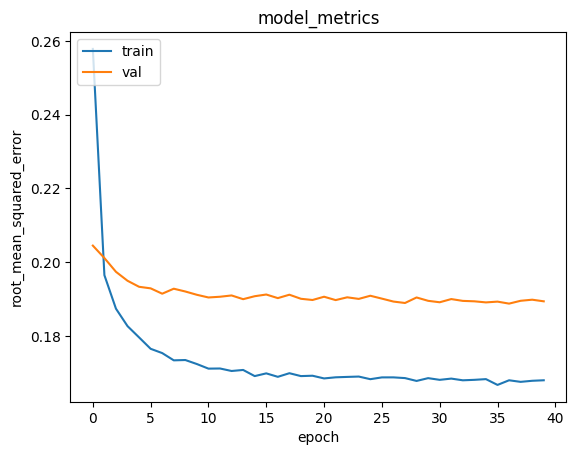

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### daftar film di rating oleh user acuan user_id

`user_id` adalah salah satu user yang dipilih secara acak.
`user_id =  collab_based_df.userId.sample(1).iloc[0]`

Daftar ini diurutkan dari film dengan rating tertinggi.

In [ ]:
# Untuk membuat rekomendasi movie
movies_df = movies_new[['movieId', 'title', 'genres']].drop_duplicates()

# Mengambil sample user
user_id = collab_based_df.userId.sample(1).iloc[0]
movies_watched_by_user = collab_based_df[collab_based_df.userId == user_id]

print('----' * 8)
print('Movies with high ratings from user')
print('----' * 8)

top_movies_user = (
    movies_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

top_movies_user = movies_df[movies_df['movieId'].isin(top_movies_user)]
top_movies_user

--------------------------------
Movies with high ratings from user
--------------------------------


,movieId,title,genres
21072,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
38584,2028,Saving Private Ryan (1998),Action|Drama|War
55516,3578,Gladiator (2000),Action|Adventure|Drama
64635,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
86868,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


### inference

Daftar rekomendasi 10 film berdasarkan film-film yang telah dirating oleh user 'user_id'.

In [ ]:
movies_not_watched = movies_df[~movies_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movies_not_watched = list(
    set(movies_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]
recommended_movies

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
--------------------------------
Top 10 movie recommendation
--------------------------------


,movieId,title,genres
1502,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
2107,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
2379,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
3624,111,Taxi Driver (1976),Crime|Drama|Thriller
14106,527,Schindler's List (1993),Drama|War
16228,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
16952,608,Fargo (1996),Comedy|Crime|Drama|Thriller
23147,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller
24007,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
45014,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


---